In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 1. 데이터 수집 및 전처리

- 출처 : 서울 열린데이터 광장
    - https://data.seoul.go.kr/dataList/OA-15387/S/1/datasetView.do
    - https://data.seoul.go.kr/dataList/OA-15388/S/1/datasetView.do

### 1) 광진구 건축물 건축면적 자료

In [3]:
con_list_raw = pd.read_csv("data/서울시 건축물대장 정보.csv", encoding = "ansi")
con_list_raw.head(10)

,관리_건축물대장_PK,관리_상위_건축물대장_PK,대장_구분_코드,대장_종류_코드,시군구_코드,법정동_코드,대지_구분_코드,번,지,특수지_명,...,대장_일련번호,총괄표제부_일련번호,표제부_일련번호,전유부_일련번호,새주소_도로_코드,새주소_법정동_코드,새주소_지상지하_코드,새주소_본_번,새주소_부_번,작업_일자
0,11215-1000000000000001408081,11215-1000000000000001407204,집합,전유부,광진구,구의동,대지,682,0,NaN,...,75,1,3,75,서울특별시 광진구 자양로,구의동,지상,227.0,NaN,20230331
1,11215-1000000000000001408007,11215-1000000000000001407204,집합,전유부,광진구,구의동,대지,682,0,NaN,...,52,1,3,52,서울특별시 광진구 자양로,구의동,지상,227.0,NaN,20230331
2,11215-100259748,11215-100259684,집합,전유부,광진구,구의동,대지,671,0,NaN,...,216,1,2,216,서울특별시 광진구 광나루로39길,구의동,지상,11.0,NaN,20230331
3,11215-100264915,11215-100264910,집합,전유부,광진구,화양동,대지,23,5,NaN,...,6,1,1,6,서울특별시 광진구 동일로,화양동,지상,174.0,0.0,20230331
4,11215-100259729,11215-100259684,집합,전유부,광진구,구의동,대지,671,0,NaN,...,197,1,2,197,서울특별시 광진구 광나루로39길,구의동,지상,11.0,NaN,20230331
5,11215-42752,11215-14962,집합,전유부,광진구,구의동,대지,252,14,NaN,...,170,1,1,170,서울특별시 광진구 자양로,구의동,지상,126.0,NaN,20230331
6,11215-100259749,11215-100259684,집합,전유부,광진구,구의동,대지,671,0,NaN,...,217,1,2,217,서울특별시 광진구 광나루로39길,구의동,지상,11.0,NaN,20230331
7,11215-100259730,11215-100259684,집합,전유부,광진구,구의동,대지,671,0,NaN,...,198,1,2,198,서울특별시 광진구 광나루로39길,구의동,지상,11.0,NaN,20230331
8,11215-100259731,11215-100259684,집합,전유부,광진구,구의동,대지,671,0,NaN,...,199,1,2,199,서울특별시 광진구 광나루로39길,구의동,지상,11.0,NaN,20230331
9,11215-100259732,11215-100259684,집합,전유부,광진구,구의동,대지,671,0,NaN,...,200,1,2,200,서울특별시 광진구 광나루로39길,구의동,지상,11.0,NaN,20230331


In [4]:
cols = ["관리_상위_건축물대장_PK", "법정동_코드", "건물_명", "새주소_도로_코드"]
con_list1 = con_list_raw[cols]
con_list1.columns = ["건축물 대장 코드", "동이름", "건물이름", "도로주소"]
con_list1

,건축물 대장 코드,동이름,건물이름,도로주소
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로
2,11215-100259684,구의동,구의자이르네,서울특별시 광진구 광나루로39길
3,11215-100264910,화양동,더 메종 건대,서울특별시 광진구 동일로
4,11215-100259684,구의동,구의자이르네,서울특별시 광진구 광나루로39길
...,...,...,...,...
28602,11215-100233887,구의동,에덴빌 4차,서울특별시 광진구 광나루로30가길
28603,11215-15967,광장동,광장현대파크빌,서울특별시 광진구 아차산로
28604,11215-14459,구의동,NaN,서울특별시 광진구 자양로48길
28605,11215-14414,구의동,NaN,서울특별시 광진구 자양로44다길


In [5]:
con_list1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28607 entries, 0 to 28606
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   건축물 대장 코드  25532 non-null  object
 1   동이름        28607 non-null  object
 2   건물이름       21322 non-null  object
 3   도로주소       28543 non-null  object
dtypes: object(4)
memory usage: 894.1+ KB


In [6]:
### 건축물 코드 결측치 확인
con_list1["건축물 대장 코드"].unique()
# 이걸론 모르겠다...

array(['11215-1000000000000001407204', '11215-100259684',
       '11215-100264910', ..., '11215-14329', '11215-14355',
       '11215-14459'], dtype=object)

In [7]:
# 건축물 대장 코드 중 3075개의 결측치(NaN) 확인
con_list1[con_list1["건축물 대장 코드"].isnull() == True]

,건축물 대장 코드,동이름,건물이름,도로주소
81,NaN,중곡동,NaN,서울특별시 광진구 능동로
88,NaN,중곡동,NaN,서울특별시 광진구 긴고랑로9길
116,NaN,구의동,구의자이르네,서울특별시 광진구 광나루로39길
123,NaN,자양동,NaN,서울특별시 광진구 아차산로40길
178,NaN,자양동,NaN,서울특별시 광진구 자양번영로3가길
...,...,...,...,...
28581,NaN,중곡동,윤하우스,서울특별시 광진구 긴고랑로10길
28582,NaN,중곡동,NaN,서울특별시 광진구 면목로9길
28586,NaN,중곡동,NaN,서울특별시 광진구 능동로
28588,NaN,중곡동,NaN,서울특별시 광진구 용마산로8가길


In [8]:
# 같은 도로주소이면서 결측치가 없는 건축물코드는?
# 광진구 능동로 예시 
con_code = con_list1[con_list1["도로주소"] == "서울특별시 광진구 능동로"]
con_code

,건축물 대장 코드,동이름,건물이름,도로주소
81,NaN,중곡동,NaN,서울특별시 광진구 능동로
170,11215-1000000000000000242880,자양동,건대입구역자이엘라,서울특별시 광진구 능동로
180,11215-1000000000000000242880,자양동,건대입구역자이엘라,서울특별시 광진구 능동로
304,11215-22865,자양동,한강현대아파트,서울특별시 광진구 능동로
368,11215-100216177,중곡동,NaN,서울특별시 광진구 능동로
...,...,...,...,...
28557,11215-100260604,자양동,자양 호반써밋,서울특별시 광진구 능동로
28560,11215-100260604,자양동,자양 호반써밋,서울특별시 광진구 능동로
28586,NaN,중곡동,NaN,서울특별시 광진구 능동로
28592,11215-100261008,자양동,자양 호반써밋,서울특별시 광진구 능동로


In [9]:
con_code["건축물 대장 코드"].value_counts()

11215-100262230                 537
11215-100265850                 514
11215-1000000000000000242880    366
11215-22889                     306
11215-20252                     167
11215-100266370                  95
11215-100260785                  75
11215-100261008                  44
11215-8100                       41
11215-100260861                  38
11215-100260604                  32
11215-20251                      12
11215-100258290                  12
11215-22865                      10
11215-22866                       9
11215-100216177                   8
11215-478                         7
11215-210                         3
11215-100263150                   3
11215-100250470                   2
11215-444                         2
11215-292                         2
11215-44                          2
11215-24666                       2
11215-100187279                   2
11215-100190662                   2
11215-100200922                   2
11215-106                   

In [10]:
print(con_code[con_code["건축물 대장 코드"] == "11215-100262230"].head(3))
print("----------------------------------------------")
print(con_code[con_code["건축물 대장 코드"] == "11215-100265850"].head(3))
print("----------------------------------------------")
print(con_code[con_code["건축물 대장 코드"] == "11215-1000000000000000242880"].head(3))
print("----------------------------------------------")
print(con_code[con_code["건축물 대장 코드"] == "11215-22889"].head(3))
## 코드 중복 순위 상위 4개 중 3개의 분석결과 아파트임을 추정할 수 있음.

            건축물 대장 코드  동이름 건물이름           도로주소
906   11215-100262230  화양동  NaN  서울특별시 광진구 능동로
1070  11215-100262230  화양동  NaN  서울특별시 광진구 능동로
1071  11215-100262230  화양동  NaN  서울특별시 광진구 능동로
----------------------------------------------
            건축물 대장 코드  동이름        건물이름           도로주소
452   11215-100265850  자양동  더 라움 펜트하우스  서울특별시 광진구 능동로
1368  11215-100265850  자양동  더 라움 펜트하우스  서울특별시 광진구 능동로
1369  11215-100265850  자양동  더 라움 펜트하우스  서울특별시 광진구 능동로
----------------------------------------------
                        건축물 대장 코드  동이름       건물이름           도로주소
170  11215-1000000000000000242880  자양동  건대입구역자이엘라  서울특별시 광진구 능동로
180  11215-1000000000000000242880  자양동  건대입구역자이엘라  서울특별시 광진구 능동로
846  11215-1000000000000000242880  자양동  건대입구역자이엘라  서울특별시 광진구 능동로
----------------------------------------------
        건축물 대장 코드  동이름      건물이름           도로주소
1364  11215-22889  자양동  이튼타워리버3차  서울특별시 광진구 능동로
1365  11215-22889  자양동  이튼타워리버3차  서울특별시 광진구 능동로
1366  11215-22889  자양동  이튼타워리버3차  서울특별시 광진구 능동로


In [11]:
# 도로명 주소에 따라서 임의의 대장 코드를 부여할까 생각해 보았으나,
# 연관성이 없을 것으로 판단...

In [12]:
con_list1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28607 entries, 0 to 28606
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   건축물 대장 코드  25532 non-null  object
 1   동이름        28607 non-null  object
 2   건물이름       21322 non-null  object
 3   도로주소       28543 non-null  object
dtypes: object(4)
memory usage: 894.1+ KB


In [13]:
con_list_raw2 = pd.read_excel("data/서울시 건축물대장 표제부 정보.xlsx")
con_list_raw2.head()

,건축물대장 관리번호,주용도 구분,기타 용도,세대수,가구수,구조 구분,기타 구조,지붕 구분,기타 지붕,건축 면적,...,부속 건축물수,부속 건축물 면적,옥내 자주식 대수,옥내 자주식 면적,옥외 자주식 대수,옥외 자주식 면적,옥내 기계식 대수,옥내 기계식 면적,옥외 기계식 대수,옥외 기계식 면적
0,11110-17349,단독주택,"주택, 정자",0,1,벽돌구조,세멘벽돌조,(철근)콘크리트,경사스라브,0.0,...,1,5.76,0,0.0,0,0.0,0,0.0,0,0.0
1,11140-17469,단독주택,주택,0,1,벽돌구조,연와조,기와,도단즙,0.0,...,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0
2,11140-17747,제2종근린생활시설,근린생활시설,0,0,철근콘크리트구조,"철근콘크리트조, 연와조",(철근)콘크리트,스라브,0.0,...,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0
3,11140-18605,단독주택,주택,0,1,일반목구조,목조,기와,와즙,0.0,...,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0
4,11110-17852,단독주택,주택,0,1,일반목구조,목조,기와,와즙,0.0,...,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0


In [14]:
cols = ["건축물대장 관리번호", "주용도 구분", "기타 용도", "건축 면적", "대지 면적", "연 면적", "건폐율", "용적율"]
con_list2 = con_list_raw2[cols]
con_list2.head()

,건축물대장 관리번호,주용도 구분,기타 용도,건축 면적,대지 면적,연 면적,건폐율,용적율
0,11110-17349,단독주택,"주택, 정자",0.0,0.0,255.36,0.0,0.0
1,11140-17469,단독주택,주택,0.0,0.0,15.21,0.0,0.0
2,11140-17747,제2종근린생활시설,근린생활시설,0.0,0.0,412.32,0.0,0.0
3,11140-18605,단독주택,주택,0.0,0.0,52.89,0.0,0.0
4,11110-17852,단독주택,주택,0.0,0.0,82.64,0.0,0.0


In [15]:
con_list2.columns = ["건축물 대장 코드", "주용도", "기타용도", "건축면적", "대지면적", "연면적", "건폐율", "용적율"]
con_list2
# 대지면적 = (연면적 / 용적률) * 100
# 건축면적 = (건페율 / 대지면적) * 100

,건축물 대장 코드,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11110-17349,단독주택,"주택, 정자",0.00,0.0,255.36,0.00,0.00
1,11140-17469,단독주택,주택,0.00,0.0,15.21,0.00,0.00
2,11140-17747,제2종근린생활시설,근린생활시설,0.00,0.0,412.32,0.00,0.00
3,11140-18605,단독주택,주택,0.00,0.0,52.89,0.00,0.00
4,11110-17852,단독주택,주택,0.00,0.0,82.64,0.00,0.00
...,...,...,...,...,...,...,...,...
606660,11140-2666,단독주택,"주택, 일반음식점",0.00,70.0,87.42,0.00,0.00
606661,11230-7148,단독주택,주택,0.00,159.0,247.21,0.00,0.00
606662,11440-18068,제2종근린생활시설,제2종근린생활시설,0.00,0.0,79.04,0.00,0.00
606663,11560-15529,제2종근린생활시설,근린생활시설,77.77,131.2,77.77,59.28,59.28


In [16]:
con_list2["건축물 대장 코드"].value_counts()

11110-17349        1
11680-18235        1
11620-13588        1
11740-100274407    1
11740-100274408    1
                  ..
11680-100198370    1
11500-10114        1
11215-17466        1
11680-100196007    1
11590-13065        1
Name: 건축물 대장 코드, Length: 606665, dtype: int64

In [17]:
gwang_size_list = pd.merge(con_list1, con_list2)
# con_list2는 서울시 전체 건축물 대장 list임을 감안하면
# merge로 광진구 건물만 추려지면서 적어지는 것은 예상가능
# 그러나, 실제 광진구의 건물의 수를 의미하는지는 자료가 더 필요함
gwang_size_list.head()

,건축물 대장 코드,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
2,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
3,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
4,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0


### checkpoint

In [18]:
gwang_size_list.to_csv("data/gwang_size_list.csv", encoding = "utf-8")

In [19]:
size_list = pd.read_csv("data/gwang_size_list.csv", encoding = "utf-8")
del size_list["Unnamed: 0"]

In [20]:
size_list["대지면적"].value_counts()
# 대지면적이 0인 데이터가 6881개.... 이것을 뭘로 채워야 할까? 

0.00        6881
25260.30    3811
4970.90      514
54083.40     477
3226.00      446
            ... 
356.40         1
170.80         1
596.43         1
191.33         1
367.90         1
Name: 대지면적, Length: 1378, dtype: int64

## 2) 결측치 확인 및 채우기

In [21]:
size_list.head()
# 필수정보 : 건축면적 and 대지면적
# 필수정보를 위한 충분조건 : 연면적/건폐율/용적률

,건축물 대장 코드,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
2,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
3,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
4,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0


In [22]:
# 대지면적 0인 구역
size_list[size_list["대지면적"] == 0]

,건축물 대장 코드,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
2,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
3,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
4,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
25091,11215-100228948,자양동,랜드마크,서울특별시 광진구 뚝섬로24길,공동주택,도시형생활주택(단지형다세대-18세대),185.8400,0.0,659.5200,0.0,0.0
25113,11215-24976,화양동,NaN,서울특별시 광진구 군자로,공동주택,연립주택,494.6000,0.0,1978.4000,0.0,0.0
25137,11215-25289,화양동,NaN,서울특별시 광진구 광나루로22길,공동주택,다세대주택,76.2300,0.0,228.6900,0.0,0.0
25176,11215-14366,구의동,NaN,서울특별시 광진구 자양로51길,공동주택,다세대주택,75.7800,0.0,236.5200,0.0,0.0


In [23]:
# 용적률 채우기 사전작업
## 1) 건물용도 별로 용적률과 건폐율이 정해져 있음
## 2) 세부적인 기준은 다르기에 같은 유형의 용적률/건폐율의 평균수치를 적용하자!
size_list.groupby(["주용도", "기타용도"]).mean()  
# 공동주택(아파트 추정), 판매시설(시설) 별도 분리 / 나머지 평균

건축면적          대지면적           연면적  \
주용도  기타용도                                                                
공동주택 (도시형생활주택:단지형다세대주택 10세대)    163.310000    303.500000    599.920000   
     공동주택                      1295.487607   2240.276693  18494.466137   
     공동주택(10세대)                 167.900000    280.800000    561.040000   
     공동주택(8세대),제1종근린생활시설(소매점)   181.690000    309.000000    748.190000   
     공동주택(다세대 8세대)               98.730000    166.300000    361.200000   
...                                    ...           ...           ...   
판매시설 공동주택(아파트)28세대 및 판매시설       791.740000      0.000000   5743.800000   
     사무실, 점포                    431.970000      0.000000   1762.880000   
     상가                        1795.370000  87591.000000   5862.160000   
     시장                        1647.930000      0.000000   4724.290000   
     판매시설                       857.810000      0.000000   2358.270000   

                                     건폐율         용적율  
주용도  기타용도                                             
공동주택 (도시형생활주택:단지형다세대주택 10세대)   53.810000  197.670000  
     공동주택                      32.733828  189.356006  
     공동주택(10세대)                59.790000  199.800000  
     공동주택(8세대),제1종근린생활시설(소매점)  58.790000  193.890000  
     공동주택(다세대 8세대)             59.370000  217.200000  
...                                  ...         ...  
판매시설 공동주택(아파트)28세대 및 판매시설      49.550000  228.170000  
     사무실, 점포                    0.000000    0.000000  
     상가                        10.480000  115.320000  
     시장                         0.000000    0.000000  
     판매시설                       0.000000    0.000000  

[665 rows x 5 columns]

In [24]:
print(size_list["주용도"].value_counts())
print("------------------------------------------------")
print(size_list[size_list["주용도"] == "공동주택"]["기타용도"].value_counts())
# 주용도의 대부분(16367개)가 공동주택
# 주용도[공동주택] 중 기타용도 대부분이 아파트, 공동주택(아파트), 공동주택
# 따라서, 용적률 / 건폐율 결측치 분배 시 3가지(아파트, 공동주택(아파트), 공동주택)는
#         별도 결측치 배분 후 나머지는 주용도 기준 평균으로 결측치를 분배한다. 

공동주택         16367
업무시설          4576
제1종근린생활시설     3947
제2종근린생활시설      203
판매시설            66
다가구주택           11
단독주택             9
근린생활시설           2
운동시설             2
Name: 주용도, dtype: int64
------------------------------------------------
아파트                           3003
공동주택(아파트)                     2192
공동주택                          1630
다세대주택                          502
근린생활시설,공동주택(아파트),업무시설,판매시설     422
                              ... 
도시형생활주택(원룸형16세대)/근린생활시설          1
(도시형생활주택:단지형다세대주택 10세대)          1
제1종근린생활시설,공동주택(다세대주택8세대)         1
도시형생활주택(원룸형) 및 근린생활시설            1
공동주택(단지형다세대10세대)                 1
Name: 기타용도, Length: 549, dtype: int64


### (1) 건폐율 결측치 채우기(공동주택 - 기타용도 3가지(아파트/공동주택(아파트)/공동주택)

In [25]:
## 기준info
size_list["건폐율"].value_counts()

0.00     6741
52.73    3811
59.88     539
16.49     473
57.38     447
         ... 
50.76       1
46.28       1
40.46       1
21.75       1
54.27       1
Name: 건폐율, Length: 888, dtype: int64

In [26]:
# 1. 기타용도 (주요 3가지 수치)와 (주요 3가지 제외 수치) 구하기
kita_mean = size_list[size_list["주용도"] == "공동주택"].groupby("기타용도").mean()
kita_mean1 = kita_mean.loc[("아파트", "공동주택", "공동주택(아파트)"), :]
# kita_mean1
kita_mean = kita_mean.reset_index()
kita_mean2 = kita_mean[(kita_mean["기타용도"] != "아파트") & \
                         (kita_mean["기타용도"] != "공동주택") & \
                         (kita_mean["기타용도"] != "공동주택(아파트)")]
kita_mean2["건폐율"].mean()

48.178563309465886

In [27]:
# 2. 기타용도 주요 3가지 결측치 찾기
# 2-1 ) 아파트 건폐율 0 / 결측치 채우기
size_list.loc[(size_list["건폐율"] == 0) & (size_list["주용도"] == "공동주택") & (size_list["기타용도"] == "아파트"), "건폐율"] = kita_mean1.loc["아파트"]["건폐율"]
size_list["건폐율"].value_counts()
# 결측치 줄임 (6741 -> 4742)

0.000000     4742
52.730000    3811
6.910796     1999
59.880000     539
16.490000     473
             ... 
57.110000       1
47.480000       1
20.684000       1
41.150000       1
54.270000       1
Name: 건폐율, Length: 889, dtype: int64

In [28]:
# 2-2 ) 공동주택 건폐율 0 / 결측치 채우기
size_list.loc[(size_list["건폐율"] == 0) & (size_list["주용도"] == "공동주택") &
              (size_list["기타용도"] == "공동주택"), "건폐율"] = kita_mean1.loc["공동주택"]["건폐율"]
size_list["건폐율"].value_counts()
# 결측치 줄임 (4742 -> 4203)

0.000000     4203
52.730000    3811
6.910796     1999
59.880000     539
32.733828     539
             ... 
57.110000       1
47.480000       1
20.684000       1
41.150000       1
54.270000       1
Name: 건폐율, Length: 890, dtype: int64

In [29]:
# 2-3 ) 공동주택(아파트) 건폐율 0 / 결측치 채우기
size_list.loc[(size_list["건폐율"] == 0) & (size_list["주용도"] == "공동주택") &
              (size_list["기타용도"] == "공동주택(아파트)"), "건폐율"] = kita_mean1.loc["공동주택(아파트)"]["건폐율"]
size_list["건폐율"].value_counts()
# 결측치 줄임 (4203 -> 2523)

52.730000    3811
0.000000     2523
6.910796     1999
6.373330     1680
59.880000     539
             ... 
52.230000       1
46.280000       1
48.140000       1
40.460000       1
54.270000       1
Name: 건폐율, Length: 891, dtype: int64

In [30]:
# 2-4 ) 주요 3가지를 제외한 건폐율 0 / 결측치 채우기(주요3가지를 제외한 나머지 평균)
size_list.loc[(size_list["건폐율"] == 0) & (size_list["주용도"] == "공동주택") &
              (size_list["기타용도"] != "아파트") &
             (size_list["기타용도"] != "공동주택") &
             (size_list["기타용도"] != "공동주택(아파트)"), "건폐율"] = kita_mean2["건폐율"].mean()
size_list["건폐율"].value_counts()
# 결측치 줄임 (2523 -> 740)

52.730000    3811
6.910796     1999
48.178563    1783
6.373330     1680
0.000000      740
             ... 
52.230000       1
46.280000       1
48.140000       1
40.460000       1
54.270000       1
Name: 건폐율, Length: 892, dtype: int64

In [31]:
size_list[size_list["건폐율"] == 0]["주용도"].value_counts()
# 740개의 0인 데이터...

업무시설         592
제2종근린생활시설    110
제1종근린생활시설     20
판매시설          13
단독주택           3
운동시설           2
Name: 주용도, dtype: int64

In [32]:
ssibal = ["업무시설", "제2종근린생활시설", "제1종근린생활시설", "판매시설",
         "단독주택", "운동시설"]
size_list.groupby("주용도").mean().loc[ssibal]
# 업무시설만 별도 적용하고 나머지는 평균으로 적용

,건축면적,대지면적,연면적,건폐율,용적율
주용도,,,,,
업무시설,1182.917423,1909.149535,21303.113287,47.382606,469.375692
제2종근린생활시설,786.464406,674.263645,2058.223392,25.434532,121.521232
제1종근린생활시설,12873.983960,24411.756747,250878.830200,52.396225,566.451464
판매시설,901.034242,11944.227273,5074.580152,34.462424,167.838788
단독주택,89.314444,108.768889,390.581111,37.780000,149.475556
운동시설,0.000000,39775.000000,2221.220000,0.000000,0.000000


In [33]:
# 업무시설 건폐율 적용
size_list.loc[(size_list["건폐율"] == 0) & (size_list["주용도"] == "업무시설"), "건폐율"] = size_list.groupby("주용도").mean().loc["업무시설", "건폐율"]
size_list[size_list["건폐율"] == 0]["주용도"].value_counts()

제2종근린생활시설    110
제1종근린생활시설     20
판매시설          13
단독주택           3
운동시설           2
Name: 주용도, dtype: int64

In [34]:
# 나머지 건폐율 적용
ssibal1 = ["제2종근린생활시설", "제1종근린생활시설", "판매시설", "단독주택", "운동시설"]
size_list.loc[(size_list["건폐율"] == 0) & (size_list["주용도"] == "운동시설") |
              (size_list["주용도"] == "제2종근린생활시설") |
              (size_list["주용도"] == "제1종근린생활시설") |
              (size_list["주용도"] == "판매시설") |
              (size_list["주용도"] == "단독주택"), "건폐율"] = size_list.groupby("주용도").mean().loc[ssibal1, "건폐율"].mean()
size_list[size_list["건폐율"] == 0]["주용도"].value_counts()

Series([], Name: 주용도, dtype: int64)

In [35]:
size_list[size_list["건폐율"] == 0].value_counts()
# 건폐율 완료

Series([], dtype: int64)

### (2) 용적율 결측치 채우기(공동주택 - 기타용도 3가지(아파트/공동주택(아파트)/공동주택)

In [36]:
## 기준info
size_list["용적율"].value_counts()

0.00      6753
579.97    3811
797.56     514
307.15     473
645.28     446
          ... 
229.17       1
187.05       1
208.56       1
222.36       1
181.38       1
Name: 용적율, Length: 1492, dtype: int64

In [37]:
# 1. 주요 3가지 수치 구하기
kita_mean = size_list[size_list["주용도"] == "공동주택"].groupby("기타용도").mean()
kita_mean1 = kita_mean.loc[("아파트", "공동주택", "공동주택(아파트)"), :]
# kita_mean1
kita_mean = kita_mean.reset_index()
kita_mean2 = kita_mean[(kita_mean["기타용도"] != "아파트") & \
                         (kita_mean["기타용도"] != "공동주택") & \
                         (kita_mean["기타용도"] != "공동주택(아파트)")]
kita_mean2["용적율"].mean()

190.35691661380358

In [38]:
# 2. 기타용도 주요 3가지 결측치 찾기
# 2-1 ) 아파트 용적율 0 / 결측치 채우기
size_list.loc[(size_list["용적율"] == 0) & (size_list["주용도"] == "공동주택") & (size_list["기타용도"] == "아파트"), "용적율"] = kita_mean1.loc["아파트"]["용적율"]
size_list["용적율"].value_counts()
# 결측치 줄임 (6753 -> 4766)

0.000000      4766
579.970000    3811
111.290363    1987
797.560000     514
307.150000     473
              ... 
248.660000       1
202.810000       1
139.060000       1
185.640000       1
181.380000       1
Name: 용적율, Length: 1493, dtype: int64

In [39]:
# 2-2 ) 공동주택 용적율 0 / 결측치 채우기
size_list.loc[(size_list["용적율"] == 0) & (size_list["주용도"] == "공동주택") &
              (size_list["기타용도"] == "공동주택"), "용적율"] = kita_mean1.loc["공동주택"]["용적율"]
size_list["용적율"].value_counts()
# 결측치 줄임 (4766 -> 4227)

0.000000      4227
579.970000    3811
111.290363    1987
189.356006     539
797.560000     514
              ... 
248.660000       1
202.810000       1
139.060000       1
185.640000       1
181.380000       1
Name: 용적율, Length: 1494, dtype: int64

In [40]:
# 2-3 ) 공동주택(아파트) 용적율 0 / 결측치 채우기
size_list.loc[(size_list["용적율"] == 0) & (size_list["주용도"] == "공동주택") &
              (size_list["기타용도"] == "공동주택(아파트)"), "용적율"] = kita_mean1.loc["공동주택(아파트)"]["용적율"]
size_list["용적율"].value_counts()
# 결측치 줄임 (4227 -> 2547)

579.970000    3811
0.000000      2547
111.290363    1987
78.825119     1680
189.356006     539
              ... 
229.170000       1
187.050000       1
208.560000       1
222.360000       1
181.380000       1
Name: 용적율, Length: 1495, dtype: int64

In [41]:
# 2-4 ) 주요 3가지를 제외한 용적율 0 / 결측치 채우기(주요3가지를 제외한 나머지 평균)
size_list.loc[(size_list["용적율"] == 0) & (size_list["주용도"] == "공동주택") &
              (size_list["기타용도"] != "아파트") &
             (size_list["기타용도"] != "공동주택") &
             (size_list["기타용도"] != "공동주택(아파트)"), "용적율"] = kita_mean2["용적율"].mean()
size_list["용적율"].value_counts()
# 결측치 줄임 (2547 -> 740)

579.970000    3811
111.290363    1987
190.356917    1807
78.825119     1680
0.000000       740
              ... 
229.170000       1
187.050000       1
208.560000       1
222.360000       1
181.380000       1
Name: 용적율, Length: 1496, dtype: int64

In [42]:
size_list[size_list["용적율"] == 0]["주용도"].value_counts()
# 740개의 0인 데이터... 건폐율과 마찬가지 작업 실시

업무시설         592
제2종근린생활시설    110
제1종근린생활시설     20
판매시설          13
단독주택           3
운동시설           2
Name: 주용도, dtype: int64

In [43]:
ssibal = ["업무시설", "제2종근린생활시설", "제1종근린생활시설", "판매시설",
         "단독주택", "운동시설"]
size_list.groupby("주용도").mean().loc[ssibal]
# 업무시설만 별도 적용하고 나머지는 평균으로 적용

,건축면적,대지면적,연면적,건폐율,용적율
주용도,,,,,
업무시설,1182.917423,1909.149535,21303.113287,53.512523,469.375692
제2종근린생활시설,786.464406,674.263645,2058.223392,30.014636,121.521232
제1종근린생활시설,12873.983960,24411.756747,250878.830200,30.014636,566.451464
판매시설,901.034242,11944.227273,5074.580152,30.014636,167.838788
단독주택,89.314444,108.768889,390.581111,30.014636,149.475556
운동시설,0.000000,39775.000000,2221.220000,30.014636,0.000000


In [44]:
# 업무시설 용적율 적용
size_list.loc[(size_list["용적율"] == 0) & (size_list["주용도"] == "업무시설"), "용적율"] = size_list.groupby("주용도").mean().loc["업무시설", "용적율"]
size_list[size_list["용적율"] == 0]["주용도"].value_counts()

제2종근린생활시설    110
제1종근린생활시설     20
판매시설          13
단독주택           3
운동시설           2
Name: 주용도, dtype: int64

In [45]:
# 나머지 용적율 적용
size_list.loc[(size_list["용적율"] == 0) & (size_list["주용도"] == "운동시설") |
              (size_list["주용도"] == "제2종근린생활시설") |
              (size_list["주용도"] == "제1종근린생활시설") |
              (size_list["주용도"] == "판매시설") |
              (size_list["주용도"] == "단독주택"), "용적율"] = size_list.groupby("주용도").mean().loc[ssibal1, "용적율"].mean()
size_list[size_list["용적율"] == 0]["주용도"].value_counts()

Series([], Name: 주용도, dtype: int64)

In [46]:
size_list[size_list["용적율"] == 0].value_counts()
# 용적율 완료

Series([], dtype: int64)

### checkpoint 2

In [47]:
size_list.to_csv("data/size_list.csv", encoding = "utf-8")

In [48]:
size_list1 = pd.read_csv("data/size_list.csv", encoding = "utf-8")
del size_list1["Unnamed: 0"]
size_list1.head()

,건축물 대장 코드,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
2,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
3,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
4,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917


### (3) 대지면적, 연면적, 건축면적 결측치 채우기

In [49]:
print(len(size_list1[size_list1["대지면적"] == 0]))
print(len(size_list1[size_list1["연면적"] == 0]))
print(len(size_list1[size_list1["건축면적"] == 0]))
# 대지면적 결측치 : 6881개 / 건축면적 결측치 : 74개 확인 
# 연면적이 모두 존재 => 1차) 대지면적 구하기, 2차) 건축면적 구하기

6881
0
74


#### 가. 대지면적 구하기
- 대지면적 = (연면적 / 용적률) * 100)

In [50]:
size_list1.head()

,건축물 대장 코드,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
2,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
3,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917
4,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,0.0,4575.5425,48.178563,190.356917


In [51]:
(size_list1[size_list1["대지면적"] == 0]["연면적"] / size_list1[size_list1["대지면적"] == 0]["용적율"]) * 100

0        2403.664958
1        2403.664958
2        2403.664958
3        2403.664958
4        2403.664958
            ...     
25091     346.464952
25113    1039.310804
25137     120.137479
25176     124.250804
25179    2098.061268
Length: 6881, dtype: float64

In [52]:
size_list1.loc[size_list1["대지면적"] == 0, "대지면적"] = (size_list1[size_list1["대지면적"] == 0]["연면적"] / size_list1[size_list1["대지면적"] == 0]["용적율"]) * 100

In [53]:
print(len(size_list1[size_list1["대지면적"] == 0]))
# 대지면적 결측치 채우기 완료

0


#### 나. 건축면적 구하기
- 건축면적 = (건폐율 / 대지면적) * 100)

In [54]:
(size_list1[size_list1["건축면적"] == 0]["건폐율"] / size_list1[size_list1["건축면적"] == 0]["대지면적"]) * 100
# 건축면적이.. 4제곱미터.. 13제곱미터.. 0.07.... 이거 맞나..
# 일단 수치를 구하고 이상치 확인을 해봐야겠다.

6341      4.217966
6342      4.217966
6343      4.217966
6344      4.217966
6345      4.217966
           ...    
22255    13.120560
22256    13.120560
23200     0.075461
23201     0.075461
24876    28.212763
Length: 74, dtype: float64

In [55]:
size_list1.loc[size_list1["건축면적"] == 0, "건축면적"] = (size_list1[size_list1["건축면적"] == 0]["건폐율"] / size_list1[size_list1["건축면적"] == 0]["대지면적"]) * 100

In [56]:
print(len(size_list1[size_list1["건축면적"] == 0]))
# 건축면적 결측치 채우기 완료

0


### checkpoint 3

In [57]:
size_list1.to_csv("data/size_list2.csv", encoding = "utf-8")

In [58]:
size_list2 = pd.read_csv("data/size_list2.csv", encoding = "utf-8")
del size_list2["Unnamed: 0"]
size_list2.head()

,건축물 대장 코드,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,연면적,건폐율,용적율
0,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,4575.5425,48.178563,190.356917
1,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,4575.5425,48.178563,190.356917
2,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,4575.5425,48.178563,190.356917
3,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,4575.5425,48.178563,190.356917
4,11215-1000000000000001407204,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,4575.5425,48.178563,190.356917


## 3) 이상치 확인 및 처리

- 건축기준 : 대지면적(최소) : 60제곱미터 
    
- 그린파킹 사업대상 : 단독주택, 근린생활시설, 아파트

- 담장허물기 주차장 : 단독, 다가구, 다세대, 연립주택
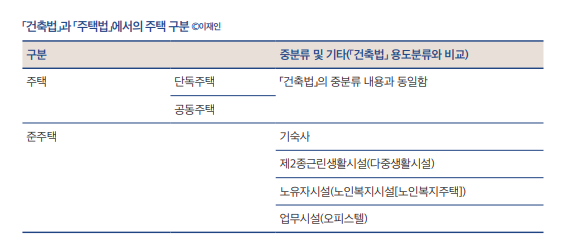

- 결론 : 주택과 근생시설만 대상

In [59]:
# 유휴면적 분석에 필요한 컬럼만 추출
cols = ["동이름", "건물이름", "도로주소", "주용도", "기타용도", "건축면적", "대지면적"]
size_list2 = size_list2[cols]
size_list2

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
...,...,...,...,...,...,...,...
25178,구의동,누리안102동,서울특별시 광진구 자양로30길,공동주택,공동주택(단지형다세대10세대),113.4000,227.250000
25179,중곡동,NaN,서울특별시 광진구 동일로72길,공동주택,아파트,463.0400,2098.061268
25180,구의동,NaN,서울특별시 광진구 자양로54길,공동주택,연립주택,338.4000,623.500000
25181,구의동,대성빌라트,서울특별시 광진구 영화사로,공동주택,"다세대주택, 근린생활시설",156.6400,262.050000


In [60]:
size_list2[size_list2["대지면적"] < 60]
# 대지면적은 기준치가 안돼는 곳은 없음

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적


#### ※ 이상치 1) 건축면적 > 대지면적 : 122개

In [61]:
size_list2[size_list2["건축면적"] > size_list2["대지면적"]]

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적
5262,자양동,자양우성3차아파트,서울특별시 광진구 뚝섬로35길,공동주택,공동주택,4326.46,2790.595402
5263,자양동,자양우성3차아파트,서울특별시 광진구 뚝섬로35길,공동주택,공동주택,4326.46,2790.595402
5264,자양동,자양우성3차아파트,서울특별시 광진구 뚝섬로35길,공동주택,공동주택,4326.46,2790.595402
5265,자양동,자양우성3차아파트,서울특별시 광진구 뚝섬로35길,공동주택,공동주택,4326.46,2790.595402
5266,자양동,자양우성3차아파트,서울특별시 광진구 뚝섬로35길,공동주택,공동주택,4326.46,2790.595402
...,...,...,...,...,...,...,...
23070,자양동,자양우성3차아파트,서울특별시 광진구 뚝섬로35길,공동주택,공동주택,4326.46,3721.983867
23304,능동,NaN,서울특별시 광진구 능동로32길,공동주택,공동주택,73.29,61.835905
23930,구의동,래미안파크스위트,서울특별시 광진구 광나루로,제2종근린생활시설,근린생활시설,561.28,253.131683
23931,구의동,래미안파크스위트,서울특별시 광진구 광나루로,제2종근린생활시설,근린생활시설,561.28,253.131683


In [62]:
# 물리적으로 존재할 수 없으므로 삭제
size_list2 = size_list2[size_list2["건축면적"] < size_list2["대지면적"]]
size_list2

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
...,...,...,...,...,...,...,...
25178,구의동,누리안102동,서울특별시 광진구 자양로30길,공동주택,공동주택(단지형다세대10세대),113.4000,227.250000
25179,중곡동,NaN,서울특별시 광진구 동일로72길,공동주택,아파트,463.0400,2098.061268
25180,구의동,NaN,서울특별시 광진구 자양로54길,공동주택,연립주택,338.4000,623.500000
25181,구의동,대성빌라트,서울특별시 광진구 영화사로,공동주택,"다세대주택, 근린생활시설",156.6400,262.050000


In [63]:
size_list2["주용도"].value_counts()
# 생각해보니 애초에 그린파킹/담장허물기 대상은 주택과 근생시설이다...
# 나머지는 삭제해도 문제없다... 없애버리자. 

공동주택         16249
업무시설          4574
제1종근린생활시설     3947
제2종근린생활시설      200
판매시설            66
다가구주택           11
단독주택             9
근린생활시설           2
운동시설             2
Name: 주용도, dtype: int64

In [64]:
# 업무시설 중 오피스텔 등 주거 형태가 있음
len(size_list2[size_list2["주용도"] == "업무시설"]["기타용도"].unique())
# 업무시설 unique 개수 75개

74

In [65]:
# 사업대상이 아닌 '주용도 시설' 제외
size_list2 = size_list2[(size_list2["주용도"] != "판매시설") & 
                        (size_list2["주용도"] != "근린생활시설") & 
                        (size_list2["주용도"] != "운동시설")]
size_list2.head()

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958


<AxesSubplot:>

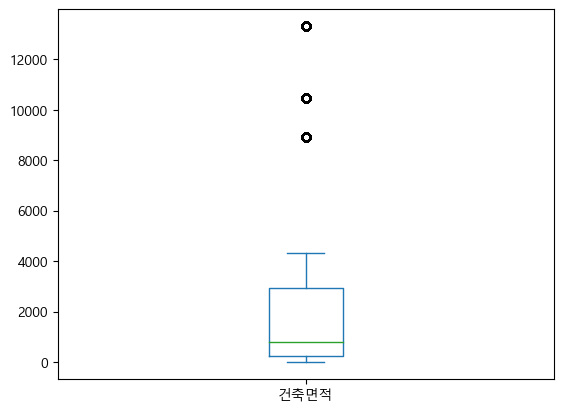

In [66]:
# boxplot을 활용한 이상치 확인
size_list2["건축면적"].plot.box()
# 유난히 건축면적이 높은 건축물이 존재

In [67]:
# boxplot상 이상치 주요 3개 : 제1종 근린시설(병원, 편의점, 노래방 등 집합시설), 공동주택 확인
size_test = size_list2[["주용도", "건축면적", "대지면적"]].sort_values("건축면적", ascending = False)
size_test[size_test["건축면적"] > 8000].groupby(["주용도", "건축면적"]).mean().sort_values("건축면적", ascending = False)
# 문제없음

대지면적
주용도       건축면적                  
제1종근린생활시설 13319.84  25260.300000
공동주택      10472.35  46623.900000
          8917.99   56069.716769

#### ※ 이상치 2) 지나치게 낮은 건축면적 확인

- 건축면적에 대한 기준이 필요
- 건축법상 최소 건축면적 기준은 없음
    - 세계가족단체협회(UIOP) 콜로뉴 기준 1인 주거면적 : 16제곱미터
    - 따라서, 1인 주거면적을 준용

In [68]:
# 매우 낮은 수치의 건축면적
size_list2[size_list2["건축면적"] < 16]["건축면적"].sort_values()

7216      0.097185
7224      0.097185
7223      0.097185
7222      0.097185
7221      0.097185
           ...    
22251    13.120560
22252    13.120560
22253    13.120560
22254    13.120560
22256    13.120560
Name: 건축면적, Length: 71, dtype: float64

In [69]:
size_list3 = size_list2[size_list2["건축면적"] >= 16]
size_list3

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
...,...,...,...,...,...,...,...
25178,구의동,누리안102동,서울특별시 광진구 자양로30길,공동주택,공동주택(단지형다세대10세대),113.4000,227.250000
25179,중곡동,NaN,서울특별시 광진구 동일로72길,공동주택,아파트,463.0400,2098.061268
25180,구의동,NaN,서울특별시 광진구 자양로54길,공동주택,연립주택,338.4000,623.500000
25181,구의동,대성빌라트,서울특별시 광진구 영화사로,공동주택,"다세대주택, 근린생활시설",156.6400,262.050000


### checkpoint 4

In [70]:
size_list3.to_csv("data/size_list3.csv", encoding = "utf-8")

In [3]:
size_list3 = pd.read_csv("data/size_list3.csv", encoding = "utf-8")
del size_list3["Unnamed: 0"]
size_list3

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958
...,...,...,...,...,...,...,...
24914,구의동,누리안102동,서울특별시 광진구 자양로30길,공동주택,공동주택(단지형다세대10세대),113.4000,227.250000
24915,중곡동,NaN,서울특별시 광진구 동일로72길,공동주택,아파트,463.0400,2098.061268
24916,구의동,NaN,서울특별시 광진구 자양로54길,공동주택,연립주택,338.4000,623.500000
24917,구의동,대성빌라트,서울특별시 광진구 영화사로,공동주택,"다세대주택, 근린생활시설",156.6400,262.050000


# 2. 건축물 여유면적 분석

- 여유면적 = 대지면적 - 건축면적
- 그린파킹/담장허물기 사업 가능면적 : 직각2.5m×5.0m/평행2.0m×6.0m(쨌든 12.5m²)

In [4]:
size_list3["여유면적"] = size_list3["대지면적"] - size_list3["건축면적"]
size_list3.head()

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,여유면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858


In [5]:
# 담장허물기 사업기준 면적 12.5m²보다 큰 것들만 뽑기
# 새변수로 담기(기준 유동성 고려)
size_list4 = size_list3[size_list3["여유면적"] > 12.5]
size_list4

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,여유면적
0,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
1,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
2,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
3,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
4,구의동,광진 파크하우스,서울특별시 광진구 자양로,공동주택,도시형생활주택소형주택,777.9131,2403.664958,1625.751858
...,...,...,...,...,...,...,...,...
24914,구의동,누리안102동,서울특별시 광진구 자양로30길,공동주택,공동주택(단지형다세대10세대),113.4000,227.250000,113.850000
24915,중곡동,NaN,서울특별시 광진구 동일로72길,공동주택,아파트,463.0400,2098.061268,1635.021268
24916,구의동,NaN,서울특별시 광진구 자양로54길,공동주택,연립주택,338.4000,623.500000,285.100000
24917,구의동,대성빌라트,서울특별시 광진구 영화사로,공동주택,"다세대주택, 근린생활시설",156.6400,262.050000,105.410000


In [16]:
dong_mean = size_list4.groupby("동이름")["여유면적"].mean().sort_values(ascending = False)
dong_mean

동이름
구의동    10247.298278
광장동     9794.282634
자양동     4695.427324
화양동     1250.213648
군자동     1055.129173
중곡동      257.972286
능동       234.864334
Name: 여유면적, dtype: float64

Text(0, 0.5, '여유면적')

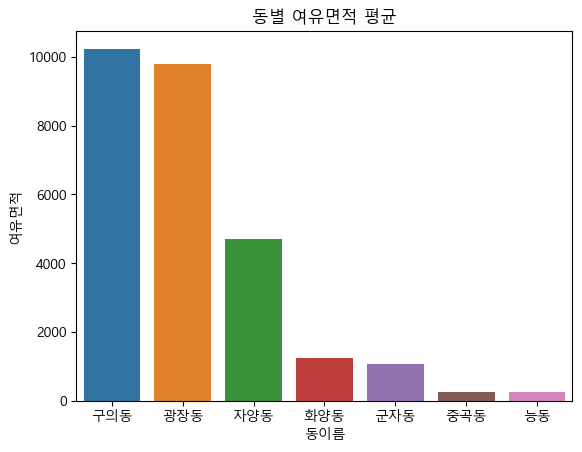

In [17]:
ax = sns.barplot(x = dong_mean.index, y = dong_mean.values)
ax.set_title("동별 여유면적 평균")
ax.set_xlabel("동이름")
ax.set_ylabel("여유면적")
# 동별 평균면적을 보면 구의동, 광장동, 자양동이 추천하기 적합해 보인다. (1, 2, 3순위)
# 차이를 보이는 원인이 무엇일까?

In [18]:
pur_mean = size_list4[size_list4["동이름"] == "구의동"].groupby("주용도")["여유면적"].mean().sort_values(ascending = False)

pur_mean1 = size_list4[size_list4["동이름"] == "광장동"].groupby("주용도")["여유면적"].mean().sort_values(ascending = False)

pur_mean2 = size_list4[size_list4["동이름"] == "자양동"].groupby("주용도")["여유면적"].mean().sort_values(ascending = False)

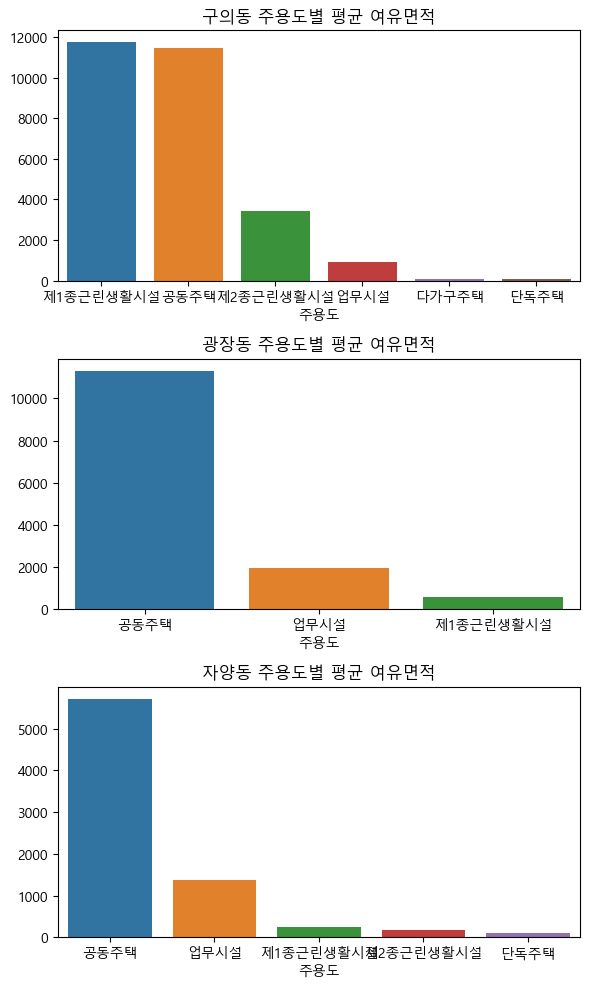

In [19]:
fig = plt.figure(figsize = (6, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.barplot(x = pur_mean.index, y = pur_mean.values, ax = ax1)
ax1.set_title("구의동 주용도별 평균 여유면적")

sns.barplot(x = pur_mean1.index, y = pur_mean1.values, ax = ax2)
ax2.set_title("광장동 주용도별 평균 여유면적")

sns.barplot(x = pur_mean2.index, y = pur_mean2.values, ax = ax3)
ax3.set_title("자양동 주용도별 평균 여유면적")

plt.tight_layout()
# 3개 동 모두 공동주택 비율이 높고, 그 중 구의동은 1종 근린생활시설 비중이 크다. 

In [53]:
# 아파트는 여유면적이 많지만 실제로 담장허물기나 부설 주차장 공유사업이 어려움을 고려
# 아파트를 빼볼까 한다. 
size_list4.loc[size_list4["기타용도"] == ("아파트" "공동주택")]

,동이름,건물이름,도로주소,주용도,기타용도,건축면적,대지면적,여유면적


In [51]:
size_list4["기타용도"].unique()

array(['도시형생활주택소형주택', '아파트(85세대),판매시설(57호),근린생활시설(9호)',
       '원룸형아파트(99세대), 주거용오피스텔(74호), 근린생활시설(9호)', '업무시설(오피스텔), 근린생활시설',
       '공동주택(아파트), 업무시설, 판매및영업시설.근린생활시설', '근린생활시설', '도시형생활주택단지형다세대(12세대)',
       '공동주택', '다세대주택', '공동주택(아파트)', '아파트', '도시형생활주택(단지형다세대-10세대)',
       '공동주택(도시형생활주택-단지형다세대)15세대', '도시형생활주택(단지형다세대)10세대,제1종근린생활시설(소매점)',
       '다세대주택(6세대), 근린생활시설', '업무시설(오피스텔) 및 근린생활시설',
       '판매시설, 공장, 관람집회시설, 교육연구시설, 근린공공시설, 근린생활시설, 업무시설, 운동시설',
       '도시형생활주택(단지형다세대 16세대) 및 제2종근린생활시설(사무소)', '도시형생활주택(단지형다세대)',
       '제2종근린생활시설,공동주택(다세대 12세대)', '다세대주택 12세대',
       '업무시설-오피스텔,제2종근린생활시설(일반음식점)', '다세대주택,근린생활시설',
       '업무시설(오피스텔),근린생활시설,문화및집회시설,공공업무시설', '도시형생활주택(단지형다세대주택-12세대)',
       '근린생활시설,공동주택(아파트),업무시설,판매시설', '업무시설(오피스텔)', '공동주택(아파트)외 3',
       '아파트(120세대)', '공동주택,근린생활시설', '다세대주택(16세대)', '공동주택(다세대주택)',
       '공동주택,업무시설(오피스텔)', '공동주택(다세대주택:도시형생활주택)', '다세대주택,제2종근린생활시설',
       '오피스텔(47호), 도시형생활주택단지형다세대(21세대), 근린생활시설', '다세대주택(6세대),근린생활시설',
       '도시형생활주택단지형다세대(10세대),근린생활시

## 1) 지도 시각화
- 서울시 행정동 구분  json파일 출처 : (근데 이거 안씀 법정동 파일 아님)
    - https://github.com/vuski/admdongkor
- 서울시 법정동 구분 (파일이 shp파일로 별도 경위도 변환필요)
    - http://data.nsdi.go.kr/dataset/15145
    - Geopandas로 통계청 지형데이터 경위도 변경작업.ipynb 를 통해 경위도 좌표 추출 
    - json파일 수작업 수정(seoul_bubjungdong.json)
    

In [20]:
import folium
import json

In [21]:
dong_mean

동이름
구의동    10247.298278
광장동     9794.282634
자양동     4695.427324
화양동     1250.213648
군자동     1055.129173
중곡동      257.972286
능동       234.864334
Name: 여유면적, dtype: float64

In [36]:
map = folium.Map(location = [37.5467284, 127.0857543], zoom_start = 13)

bub_geo = json.load(open("data/seoul_bubjungdong.json"))

map.choropleth(geo_data = bub_geo, data = dong_mean, 
               key_on = "feature.id", columns = ["동이름", "여유면적"],
               fill_color = "PuRd") 
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Object `pd.to_csv` not found.
